### Problem Statement

`The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
aerofit_data = pd.read_csv('aerofit_treadmill.csv')
print('Shape',aerofit_data.shape)
aerofit_data.head()

Shape (180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
for col in aerofit_data.columns:
    print('*'*30)
    print(col, aerofit_data[col].value_counts())
    print('*'*30)

******************************
Product KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
******************************
******************************
Age 25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
******************************
******************************
Gender Male      104
Female     76
Name: Gender, dtype: int64
******************************
******************************
Education 16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
******************************
******************************
MaritalStatus Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
******************************
******************************
Usage 3    69
4

`No null values available`
***

In [6]:
aerofit_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
pd.DataFrame({'mean':aerofit_data.mean().round(2), 'median':aerofit_data.median().round(2)}).T

,Age,Education,Usage,Fitness,Income,Miles
mean,28.79,15.57,3.46,3.31,53719.58,103.19
median,26.00,16.00,3.00,3.00,50596.50,94.00


In [8]:
aerofit_data.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,25,Male,16,Partnered,3,3,45480,85


`1. Median and Mean look fine for all features.`\
`2. Mode for Miles is low compared to mean and median`
***

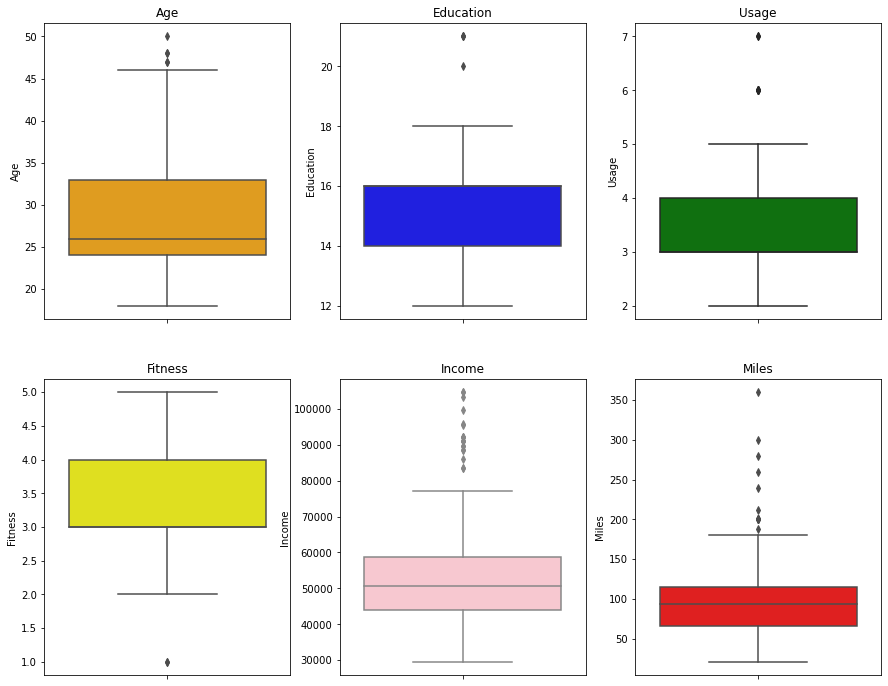

In [9]:
fig = plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
sns.boxplot(y=aerofit_data['Age'], color='orange')
plt.title('Age')

plt.subplot(2,3,2)
sns.boxplot(y=aerofit_data['Education'], color='blue')
plt.title('Education')

plt.subplot(2,3,3)
sns.boxplot(y=aerofit_data['Usage'], color='green')
plt.title('Usage')

plt.subplot(2,3,4)
sns.boxplot(y=aerofit_data['Fitness'], color='yellow')
plt.title('Fitness')

plt.subplot(2,3,5)
sns.boxplot(y=aerofit_data['Income'], color='pink')
plt.title('Income')

plt.subplot(2,3,6)
sns.boxplot(y=aerofit_data['Miles'], color='red')
plt.title('Miles')

plt.show()


In [10]:
aerofit_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
print(f"99th percentiles: \n\n{aerofit_data.quantile(0.95)}")

99th percentiles: 

Age             43.05
Education       18.00
Usage            5.05
Fitness          5.00
Income       90948.25
Miles          200.00
Name: 0.95, dtype: float64


`All features's (except Income) 95th percentile look fine and making sense wrt other quantiles and mean`\
`Let's plot histogram for Income and check right most values`

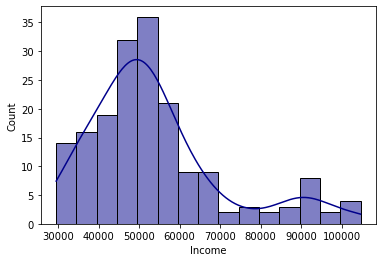

In [12]:
sns.histplot(aerofit_data['Income'], kde=True, color='darkblue')
plt.show()

`We can say Income distribution is right tailed and can't find outliers in this so lets go ahead with this`
***

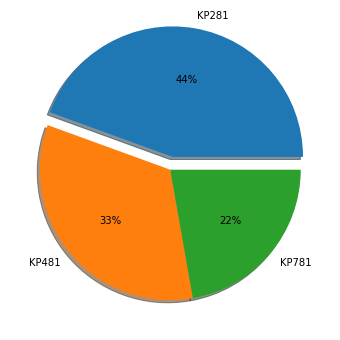

In [13]:
plt.figure(figsize=(10,6))
plt.pie(aerofit_data['Product'].value_counts(), labels=aerofit_data['Product'].value_counts().index, 
        autopct='%1.0f%%', shadow=True, explode=[0.1,0,0])
plt.show()

`KP281 product is most selling model compare to other two products KP481 and KP781`
***

In [14]:
product281 = aerofit_data[aerofit_data['Product']=='KP281']
product481 = aerofit_data[aerofit_data['Product']=='KP481']
product781 = aerofit_data[aerofit_data['Product']=='KP781']

### Age vs Product 

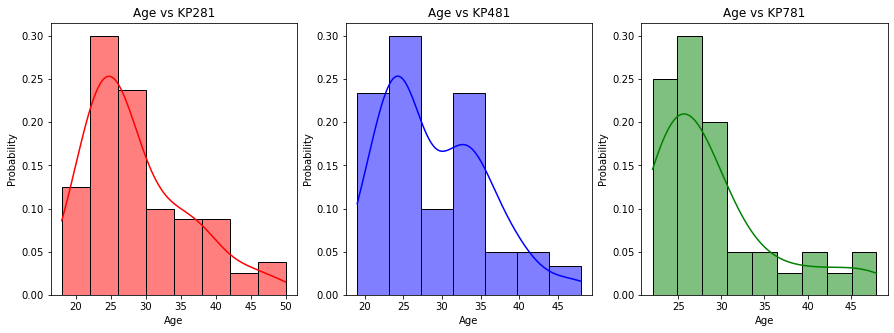

In [15]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(product281, x='Age', kde=True, color='red', stat='probability')
plt.title('Age vs KP281')

plt.subplot(1,3,2)
sns.histplot(product481, x='Age', kde=True, color='blue', stat='probability')
plt.title('Age vs KP481')

plt.subplot(1,3,3)
sns.histplot(product781, x='Age', kde=True, color='green', stat='probability')
plt.title('Age vs KP781')

plt.show()

`Age bracket 20-30 (youth) is the peak for all three products with around 30% probability.`\
`Mid age adult purchased less with around 5% probability, looks like normal behaviour only`\
`Also distribution look same for all three products`
***

### Marital Status, Gender vs Product

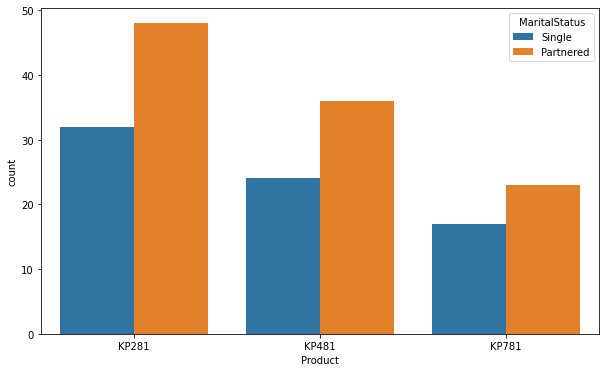

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=aerofit_data, x='Product', hue='MaritalStatus')
fig.show()

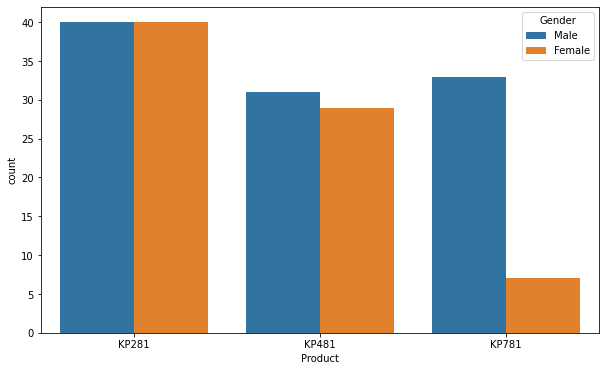

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=aerofit_data, x='Product', hue='Gender')
fig.show()

`Partnered marital status people purchased more compare to Single.`\
`Male purchased most advanced features product KP781.`

### Income vs Product

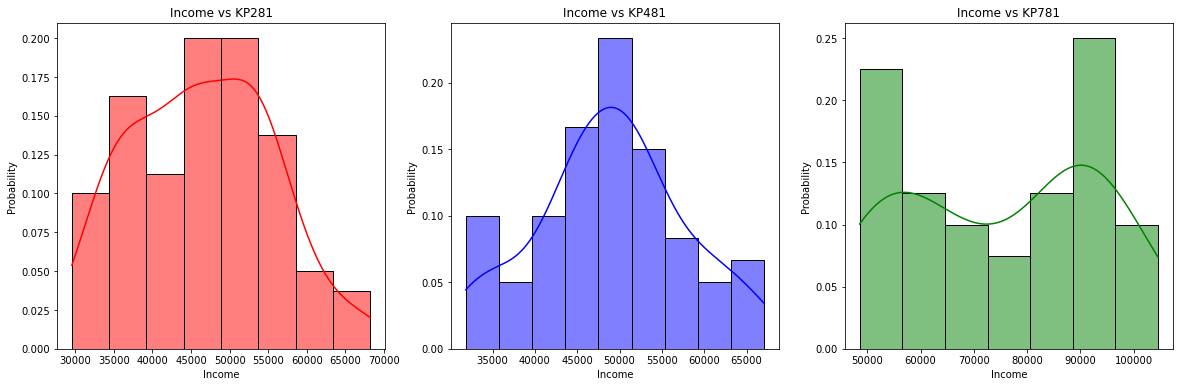

In [18]:
fig = plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(product281, x='Income', kde=True, color='red', stat='probability')
plt.title('Income vs KP281')

plt.subplot(1,3,2)
sns.histplot(product481, x='Income', kde=True, color='blue', stat='probability')
plt.title('Income vs KP481')

plt.subplot(1,3,3)
sns.histplot(product781, x='Income', kde=True, color='green', stat='probability')
plt.title('Income vs KP781')

plt.show()

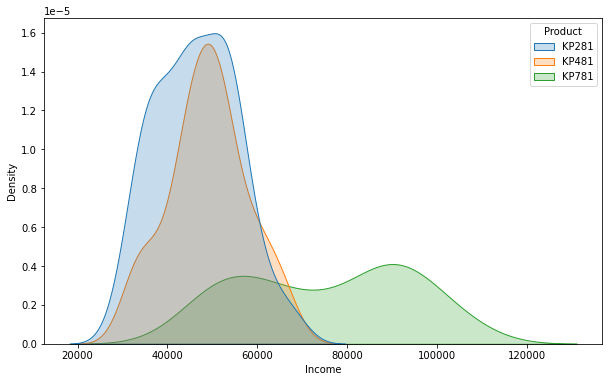

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=aerofit_data, x='Income', hue='Product', fill=True)
plt.show()

`Mostly 30k-70k income bracket people purchased entry and mid level products where mid level product mostly purchased by who has Income ~50k`\
`Advanced features product mostly purchased by very high income people with two peaks(almost distributed uniformaly) 55k and 95k`

### Income vs Gender

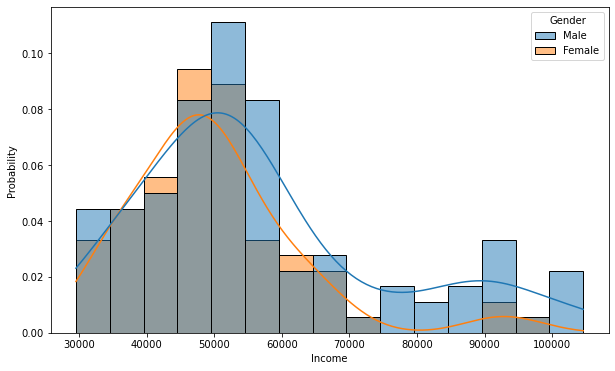

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=aerofit_data, x='Income', hue='Gender', kde=True, stat = "probability")
plt.show()

`From Mid to high income, Male have more Income`

### Age vs Income vs Product

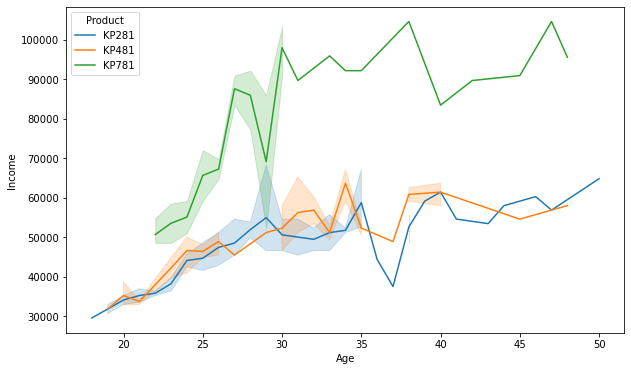

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=aerofit_data, x='Age', y='Income', hue='Product')
plt.show()

`KP281 and KP481 purchased mostly within all age brackets and 30k-60k Income.` \
`But 35-40 Age adult bracket has reverese pattern, people purchased KP781 product most.`\
`Also KP781 product purchased in Age bracket 25-48 and Income within 50k-110k only.`
***

### Age vs Miles vs Product

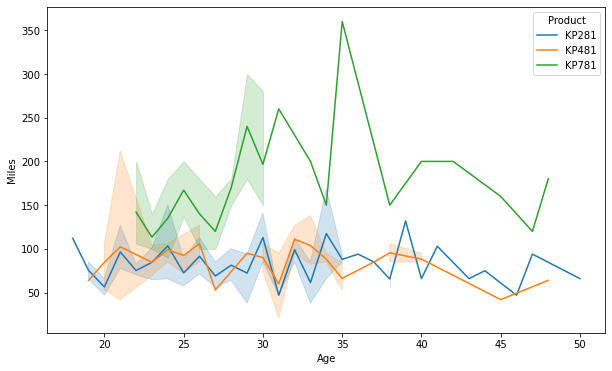

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data=aerofit_data, x='Age', y='Miles', hue='Product')
plt.show()

`Mostly KP781 product purchased for Age range 35-40 and high miles 300+`


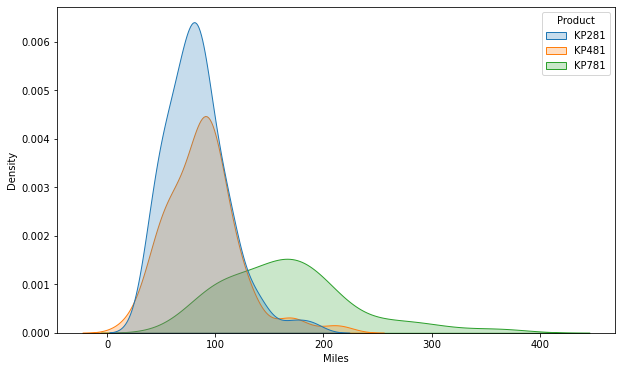

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=aerofit_data, x='Miles', hue='Product', fill=True)
plt.show()

`KP281 and KP481 products used for low miles(50-100 miles)run where KP781 used for low to high miles ~400 and maximum purchased for 100-200 miles run target.`
***

### Age vs Fitness vs Product

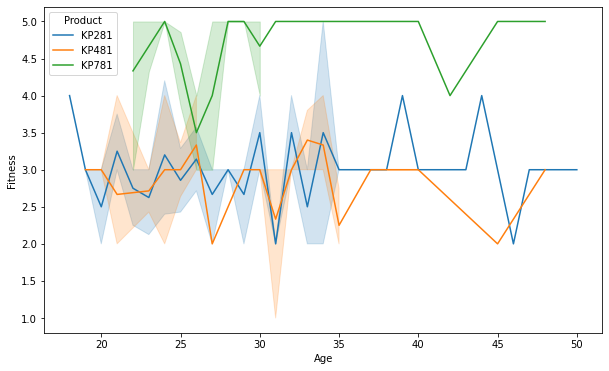

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=aerofit_data, x='Age', y='Fitness', hue='Product')
plt.show()

`Age bracket 30+ to 40 and fitness level 5 has best selling product KP781. where other two products KP281 and KP481 are good option for all age groups.`

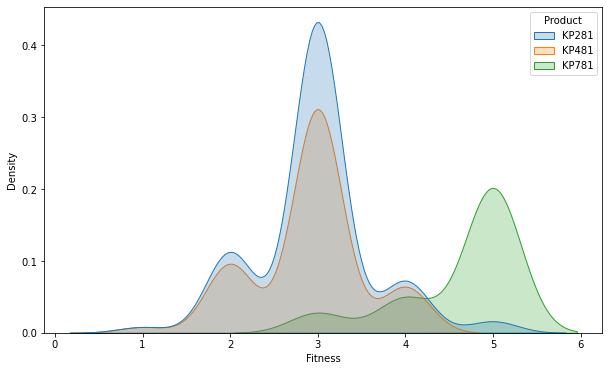

In [25]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=aerofit_data, x='Fitness', hue='Product', fill=True)
plt.show()

`KP281 and KP481 products purchased for mid level fitness 2-3 and for top fitness 4-5, KP781 is a good option.`
***

### Education vs Product

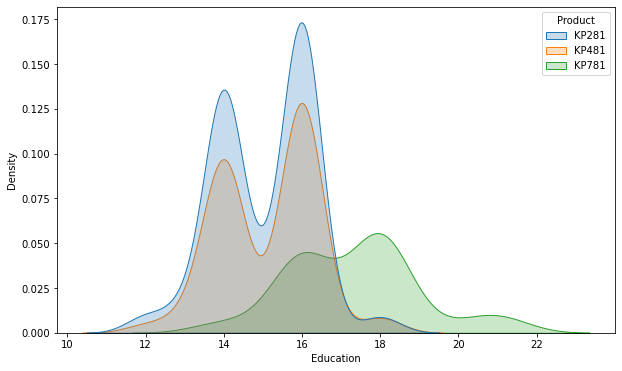

In [26]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=aerofit_data, x='Education', hue='Product', fill=True)
plt.show()

`For mid education years (14 and 16), mostly KP281 and KP481 purchased.`\
`Where KP781 product purchasing range distributed between mid-high education years (15, 22) and mostly purchased by 18 education years people.`
***

### Heat Map

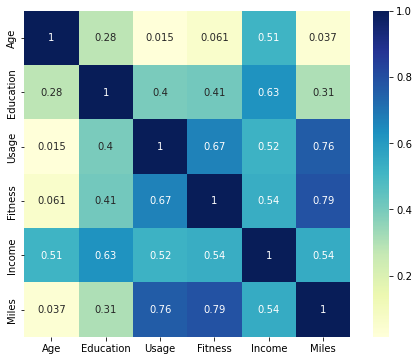

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(aerofit_data.corr(),cmap="YlGnBu", annot=True, square=True)
plt.show()

`High Correlated Features:`\
`1. Miles- Fitness, Usage.`\
`2. Income - Education.`\

`Low Correlated Features:`\
`1. Age -  Miles, Fitness and Usage.`

### Pair Plot

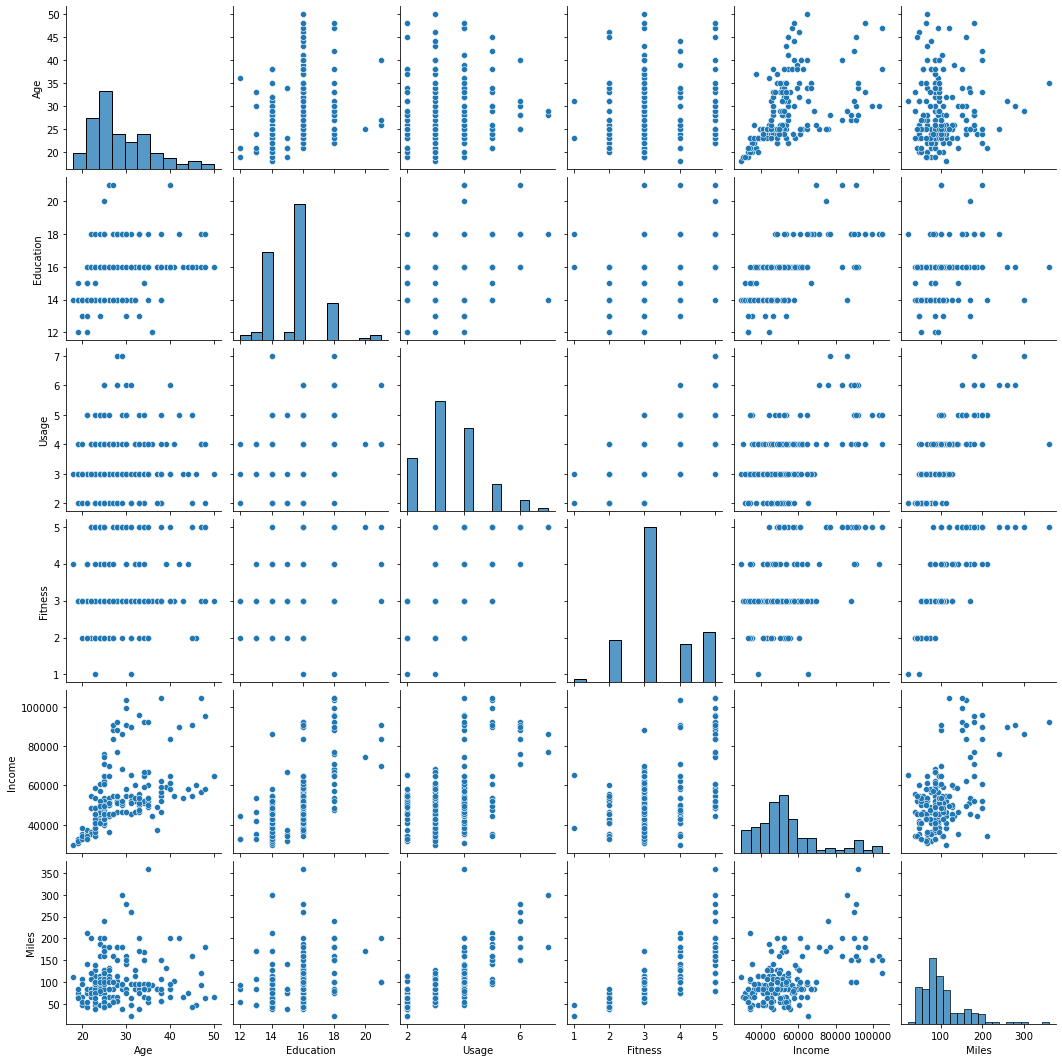

In [28]:
sns.pairplot(aerofit_data)
plt.show()

`For Income and Miles: Major chunk available in Low Income and Low Miles, very few for high income and high miles.`\
`For Income and Age: Low Income and Low age bracket going linearly after that it has spreaded across mid-old age people with high income.`
***

### Bins

`Let's put age, income, miles, education into buckets/range for better understanding.`

In [29]:
age_bins = [17,30,40,50]
age_labels = ['18-30', '30-40', '40-50']
aerofit_data['Age_bins'] = pd.cut(aerofit_data['Age'],bins=age_bins,labels=age_labels)
aerofit_data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-30
21,KP281,23,Male,16,Single,4,3,40932,94,18-30
89,KP481,23,Female,16,Single,3,3,45480,95,18-30
132,KP481,37,Female,16,Partnered,2,3,48891,85,30-40
49,KP281,28,Female,16,Partnered,3,3,51165,56,18-30


In [30]:
income_bins = [29000,50000,75000,110000]
income_labels = ['29k-50k', '50k-75k', '75k-110k']
aerofit_data['Income_bins'] = pd.cut(aerofit_data['Income'],bins=income_bins,labels=income_labels)
aerofit_data.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
69,KP281,38,Female,14,Partnered,2,3,54576,56,30-40,50k-75k
122,KP481,33,Male,16,Partnered,3,3,51165,95,30-40,50k-75k
12,KP281,22,Female,16,Single,4,3,36384,75,18-30,29k-50k
56,KP281,31,Female,14,Single,2,2,45480,47,30-40,29k-50k
130,KP481,35,Female,16,Single,3,2,50028,64,30-40,50k-75k
125,KP481,34,Female,16,Partnered,4,3,64809,95,30-40,50k-75k
176,KP781,42,Male,18,Single,5,4,89641,200,40-50,75k-110k
68,KP281,38,Male,16,Partnered,3,3,46617,75,30-40,29k-50k
83,KP481,20,Male,14,Single,3,3,38658,95,18-30,29k-50k
33,KP281,25,Male,16,Single,3,3,43206,85,18-30,29k-50k


In [31]:
miles_bins = [20,100,200,300,400]
miles_labels = ['20-100','100-200', '200-300','300-400']
aerofit_data['Miles_bins'] = pd.cut(aerofit_data['Miles'],bins=miles_bins,labels=miles_labels)
aerofit_data.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bins
73,KP281,40,Male,16,Partnered,3,3,61398,66,30-40,50k-75k,20-100
120,KP481,33,Male,13,Partnered,4,4,53439,170,30-40,50k-75k,100-200
145,KP781,23,Male,16,Single,4,5,48556,100,18-30,29k-50k,20-100
98,KP481,25,Female,14,Single,3,4,43206,127,18-30,29k-50k,100-200
91,KP481,23,Female,16,Partnered,3,2,43206,74,18-30,29k-50k,20-100
84,KP481,21,Female,14,Partnered,5,4,34110,212,18-30,29k-50k,200-300
63,KP281,35,Male,16,Partnered,4,3,48891,85,30-40,29k-50k,20-100
146,KP781,24,Male,16,Single,4,5,61006,100,18-30,50k-75k,20-100
75,KP281,43,Male,16,Partnered,3,3,53439,66,40-50,50k-75k,20-100
29,KP281,25,Female,14,Partnered,2,2,53439,47,18-30,50k-75k,20-100


In [32]:
miles_bins = [11,14,16,18,22]
miles_labels = ['12-14','14-16', '16-18','18-21']
aerofit_data['Education_bins'] = pd.cut(aerofit_data['Education'],bins=miles_bins,labels=miles_labels)
aerofit_data.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bins,Education_bins
132,KP481,37,Female,16,Partnered,2,3,48891,85,30-40,29k-50k,20-100,14-16
120,KP481,33,Male,13,Partnered,4,4,53439,170,30-40,50k-75k,100-200,12-14
19,KP281,23,Female,15,Partnered,2,2,34110,38,18-30,29k-50k,20-100,14-16
113,KP481,30,Female,14,Single,3,3,57987,74,18-30,50k-75k,20-100,12-14
67,KP281,37,Female,16,Partnered,3,3,37521,85,30-40,29k-50k,20-100,14-16
87,KP481,23,Male,14,Partnered,3,3,36384,95,18-30,29k-50k,20-100,12-14
43,KP281,27,Female,14,Partnered,2,3,45480,56,18-30,29k-50k,20-100,12-14
162,KP781,28,Female,18,Partnered,6,5,92131,180,18-30,75k-110k,100-200,16-18
70,KP281,38,Male,14,Single,2,3,52302,56,30-40,50k-75k,20-100,12-14
123,KP481,33,Female,16,Partnered,5,3,53439,95,30-40,50k-75k,20-100,14-16


### Probability with Crosstab

#### Age Conditional

In [33]:
pd.crosstab(aerofit_data['Age_bins'], aerofit_data['Product'], margins=True,
                        normalize='index').round(2)

Product,KP281,KP481,KP781
Age_bins,,,
18-30,0.46,0.29,0.25
30-40,0.40,0.48,0.12
40-50,0.50,0.17,0.33
All,0.44,0.33,0.22


`Conditional Probability:`\
`30-40 age group adult mostly prefer KP481 product with 48% probability`\
`KP781 product has highest probability 33% in 40-50 age bracket.`\
`Any age group adult mostly prefer KP281 product with 40-50% probability.`

#### Age Marginal

In [34]:
pd.crosstab(aerofit_data['Age_bins'], aerofit_data['Product'], margins=True,
                        normalize=True).round(2)

Product,KP281,KP481,KP781,All
Age_bins,,,,
18-30,0.31,0.19,0.17,0.67
30-40,0.11,0.13,0.03,0.27
40-50,0.03,0.01,0.02,0.07
All,0.44,0.33,0.22,1.00


`Marginal Probability:`\
`Age group 18-30 has highest probability 67% to buy any product and 40-50 has very low 7%`

#### Income Conditional

In [35]:
pd.crosstab(aerofit_data['Income_bins'], aerofit_data['Product'], normalize='index', margins=True).round(2)

Product,KP281,KP481,KP781
Income_bins,,,
29k-50k,0.58,0.36,0.06
50k-75k,0.42,0.39,0.18
75k-110k,0.00,0.00,1.00
All,0.44,0.33,0.22


`Probability of Adults coming in Income range 29-75k to buy KP281 in 40-60% range`\
`Where only high income range adults 75k-110k adults are preferring to purchase KP781 with 100% probability`

#### Income Marginal

In [36]:
pd.crosstab(aerofit_data['Income_bins'], aerofit_data['Product'], normalize=True, margins=True).round(2)

Product,KP281,KP481,KP781,All
Income_bins,,,,
29k-50k,0.27,0.17,0.03,0.46
50k-75k,0.18,0.17,0.08,0.42
75k-110k,0.00,0.00,0.12,0.12
All,0.44,0.33,0.22,1.00


`Income range 29-75k adults have purchasing any product is around 88% and 75k-110k has only 12% .`

#### Miles Cond.

In [37]:
pd.crosstab(aerofit_data['Miles_bins'], aerofit_data['Product'], normalize='index', margins=True).round(2)

Product,KP281,KP481,KP781
Miles_bins,,,
20-100,0.54,0.39,0.07
100-200,0.30,0.25,0.45
200-300,0.00,0.20,0.80
300-400,0.00,0.00,1.00
All,0.44,0.33,0.22


`For 20-100 miles, KP281 with 54% most purchased product and 39% KP481`\
`From mid to high miles, KP781 product most purchased from 50-100% probability.`

#### Miles Marg.

In [38]:
pd.crosstab(aerofit_data['Miles_bins'], aerofit_data['Product'], normalize=True, margins=True).round(2)

Product,KP281,KP481,KP781,All
Miles_bins,,,,
20-100,0.34,0.24,0.04,0.63
100-200,0.10,0.08,0.15,0.33
200-300,0.00,0.01,0.02,0.03
300-400,0.00,0.00,0.01,0.01
All,0.44,0.33,0.22,1.00


`96% probability to buy any product for 20-200 miles`\
`For high miles range 200-400, 4% probability is there.`

### Gender Cond.

In [52]:
pd.crosstab(aerofit_data['Gender'], aerofit_data['Product'], normalize='index', margins=True).round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32
All,0.44,0.33,0.22


`Female has more probability for KP281 and KP481 with 53 and 38% respectively.`\
`Male has equal probability for all products.`

#### Gender Marg.

In [53]:
pd.crosstab(aerofit_data['Gender'], aerofit_data['Product'], normalize=True, margins=True).round(2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.22,0.16,0.04,0.42
Male,0.22,0.17,0.18,0.58
All,0.44,0.33,0.22,1.00


`Male has 58% probablity to buy any product where Female has 42%.`

#### Usage Cond.

In [42]:
pd.crosstab(aerofit_data['Usage'], aerofit_data['Product'], normalize='index', margins=True).round(2)

Product,KP281,KP481,KP781
Usage,,,
2,0.58,0.42,0.00
3,0.54,0.45,0.01
4,0.42,0.23,0.35
5,0.12,0.18,0.71
6,0.00,0.00,1.00
7,0.00,0.00,1.00
All,0.44,0.33,0.22


`For usage level 2-3, KP281 and KP481 have near 40-50% probability.`\
`In high usage level 6-7, KP781 is with 100% probability.` 

#### Usage Marg.

In [43]:
pd.crosstab(aerofit_data['Usage'], aerofit_data['Product'], normalize=True, margins=True).round(2)

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.11,0.08,0.00,0.18
3,0.21,0.17,0.01,0.38
4,0.12,0.07,0.10,0.29
5,0.01,0.02,0.07,0.09
6,0.00,0.00,0.04,0.04
7,0.00,0.00,0.01,0.01
All,0.44,0.33,0.22,1.00


`2-4 usage level adults purchased with 84% probability and remaining with high lvevel usage.`

#### Fitness Cond.

In [44]:
pd.crosstab(aerofit_data['Fitness'], aerofit_data['Product'], normalize='index', margins=True).round(2)

Product,KP281,KP481,KP781
Fitness,,,
1,0.50,0.50,0.00
2,0.54,0.46,0.00
3,0.56,0.40,0.04
4,0.38,0.33,0.29
5,0.06,0.00,0.94
All,0.44,0.33,0.22


`Fitness level  1-3 adult purchased KP281 and KP481 with 50-50% probability approx.`\
`For high fitness level 5, KP781 is with 94%.`

#### Fitness Marg.

In [45]:
pd.crosstab(aerofit_data['Fitness'], aerofit_data['Product'], normalize=True, margins=True).round(2)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.01,0.01,0.00,0.01
2,0.08,0.07,0.00,0.14
3,0.30,0.22,0.02,0.54
4,0.05,0.04,0.04,0.13
5,0.01,0.00,0.16,0.17
All,0.44,0.33,0.22,1.00


`Fitness level 1-3 adults purchased with 70% probability.`\
`Where high fitness level4-5 adults purchased with 30% probability only.`

#### Education Cond.

In [46]:
pd.crosstab(aerofit_data['Education_bins'], aerofit_data['Product'], normalize='index', margins=True).round(2)

Product,KP281,KP481,KP781
Education_bins,,,
12-14,0.56,0.41,0.03
14-16,0.48,0.36,0.17
16-18,0.09,0.09,0.83
18-21,0.00,0.00,1.00
All,0.44,0.33,0.22


`12-16 education years adults are going mostly with KP281 and KP481 in 40-50% probability for each.`\
`Where 16-21 education years adults have 83-100% probability to buy only KP781.`

#### Education Marg

In [47]:
pd.crosstab(aerofit_data['Education_bins'], aerofit_data['Product'], normalize=True, margins=True).round(2)

Product,KP281,KP481,KP781,All
Education_bins,,,,
12-14,0.19,0.14,0.01,0.35
14-16,0.24,0.18,0.08,0.50
16-18,0.01,0.01,0.11,0.13
18-21,0.00,0.00,0.02,0.02
All,0.44,0.33,0.22,1.00


`Education years 12-16 has 87% probability to buy any product.`\
`Where 18-21 has only 2%.`

#### Age and Income Cond.

In [48]:
pd.crosstab([aerofit_data['Age_bins'], aerofit_data['Income_bins']], aerofit_data['Product'], normalize='index').round(2)

Product               KP281  KP481  KP781
Age_bins Income_bins                     
18-30    29k-50k       0.55   0.38   0.07
         50k-75k       0.40   0.20   0.40
         75k-110k      0.00   0.00   1.00
30-40    29k-50k       0.78   0.22   0.00
         50k-75k       0.36   0.64   0.00
         75k-110k      0.00   0.00   1.00
40-50    50k-75k       0.75   0.25   0.00
         75k-110k      0.00   0.00   1.00

`Irrespective of any age group, high income adults are going for KP781 model only with 100% probability.`\
`Income group 30-40 are not going for KP781 model.`

#### Fitness and Miles Cond.

In [49]:
pd.crosstab([aerofit_data['Fitness'],  aerofit_data['Usage'], aerofit_data['Miles_bins']], aerofit_data['Product'], normalize='index').round(2)

Product                   KP281  KP481  KP781
Fitness Usage Miles_bins                     
1       2     20-100       0.00   1.00   0.00
        3     20-100       1.00   0.00   0.00
2       2     20-100       0.64   0.36   0.00
        3     20-100       0.40   0.60   0.00
        4     20-100       0.50   0.50   0.00
3       2     20-100       0.50   0.50   0.00
              100-200      1.00   0.00   0.00
        3     20-100       0.60   0.40   0.00
              100-200      0.25   0.75   0.00
        4     20-100       0.67   0.17   0.17
              100-200      0.42   0.50   0.08
        5     20-100       0.00   1.00   0.00
              100-200      0.00   1.00   0.00
4       3     20-100       0.33   0.67   0.00
              100-200      0.57   0.43   0.00
        4     20-100       0.00   0.00   1.00
              100-200      0.50   0.33   0.17
        5     20-100       0.00   0.00   1.00
              100-200      0.25   0.00   0.75
              200-300      0.00   1.00   0.00
        6     100-200      0.00   0.00   1.00
5       3     100-200      0.00   0.00   1.00
        4     20-100       0.00   0.00   1.00
              100-200      0.11   0.00   0.89
              300-400      0.00   0.00   1.00
        5     100-200      0.11   0.00   0.89
        6     100-200      0.00   0.00   1.00
              200-300      0.00   0.00   1.00
        7     100-200      0.00   0.00   1.00
              200-300      0.00   0.00   1.00

`Fitness level 5, high miles 200-400 and high usage has best option to choose KP781 with 100% probability.`

#### Gender and Marital Status Cond.

In [50]:
pd.crosstab([aerofit_data['Gender'], aerofit_data['MaritalStatus']], aerofit_data['Product'], normalize='index').round(2)

Product               KP281  KP481  KP781
Gender MaritalStatus                     
Female Partnered       0.59   0.33   0.09
       Single          0.43   0.47   0.10
Male   Partnered       0.34   0.34   0.31
       Single          0.44   0.23   0.33

`Female and partnered status adults are going for KP281 with 59% probability.`\
`male with Single status adults are going for same KP281 with 44% probability.`

#### Gender and Age Cond.

In [51]:
pd.crosstab([aerofit_data['Gender'], aerofit_data['Age_bins']], aerofit_data['Product'], normalize='index').round(2)

Product          KP281  KP481  KP781
Gender Age_bins                     
Female 18-30      0.55   0.33   0.12
       30-40      0.41   0.55   0.05
       40-50      1.00   0.00   0.00
Male   18-30      0.39   0.26   0.35
       30-40      0.38   0.42   0.19
       40-50      0.33   0.22   0.44

`Female in 18-30 age group purchased KP281 with 55% probability.`\
`Female in 30-40 age group purchased KP481 with 55% probability.`\
`Male probability to buy any product in all age group looks very identical, but for KP781 in 40-50 age group has 44% probability.`

### Customer Profiling:

`1. KP281: Income range 29-50k, Any age group, Female with partnered status, Miles range 20-100, Usage 2-4, Fitness 1-4 and Education 12-16.`

`2. KP481: Income range 50-75k , Age group 30-40, Miles 20-100, Any gender with Single status, usage 2-3, fitness 1-4 and Education 12-16.`

`3. KP781: Income range 75-110k, Age group 18-30 or 40-50, Male with any status, miles 200-400, usage 6-7, Fitness 5, Education 16-20.`

### Recommendations:

`1.Aerofit should target low income, limited usage,  low to medium fitness level and Education years till 16 with entry level product KP281 only.`\
`2. For medium income range, mid age adults with single marital status, low to medium fitness and education till 16 years, intermidate product KP481 is good recommendation.` \
`3. For High income, Male, high miles, usage, fitness and education years 16-20, advanced level product KP781 is best recommendation.`\
`4. Although Fitness, usage and miles are positively correlated so we can recommend on any single feature also.`\
`5.Income and Education are also positively correlated with each other.`